# Semantic Segmentation


## Class Heatmap
![Heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRd6rCHDMj1Yf8lrDD5in14daoDyegD-EfCI6fwU7dSD9VB9OW)

## Different CV Tasks
![CVTasks](https://miro.medium.com/max/2000/1*cHtBw8yBhprNXj-CBQBx5g.png)

## Traditional way (CRF)



## Fully Convolutional NN

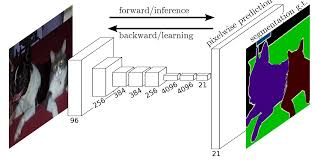

## Deconvolution, Transposed Conv and Upsampling




https://distill.pub/2016/deconv-checkerboard/

When we have neural networks generate images, we often have them build them up from low resolution, high-level descriptions. This allows the network to describe the rough image and then fill in the details.

In order to do this, we need some way to go from a lower resolution image to a higher one. We generally do this with the deconvolution operation. Roughly, deconvolution layers allow the model to use every point in the small image to “paint” a square in the larger one.

(Deconvolution has a number of interpretations and different names, including “transposed convolution.”


http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
https://github.com/vdumoulin/conv_arithmetic

__How to get larger feature maps out of small ones?__
Let’s now consider what would be required to go the other way around, i.e., map from a 4-dimensional space to a 16-dimensional space. This operation is known as a transposed convolution.
Sometimes, it is referred to as "fractionally strided convolutions", becasue if you imagine you have stride S=1/2, then you enlarge the size by 2.

The simplest way is to apply a kernel that is larger in size than the input, and use __normal__ conv:

Convolving kernel N=3 with input M=2 gives N+M-1=4 --> 4x4 output

![Deconv](http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif)

But what if we have a large input, like 100x100, and we want to have bigger output.
In this case we can pad the input:


![Deconv_pad](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides_transposed.gif)

__Fraction strides__
transpose of a convolution with s > 1 involves an equivalent convolution with s < 1. As will be explained, this is a valid intuition, which is why transposed convolutions are sometimes called fractionally strided convolutions.

![Strided_deconv](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides_transposed.gif)


## Dialated Conv

Those familiar with the deep learning literature may have noticed the term “dilated convolutions” (or “atrous convolutions”, from the French expression convolutions à trous) appear in recent papers. Here we attempt to provide an intuitive understanding of dilated convolutions. For a more in-depth description and to understand in what contexts they are applied, see Chen et al. (2014) [2]; Yu and Koltun (2015) [3].

Dilated convolutions “inflate” the kernel by inserting spaces between the kernel elements. The dilation “rate” is controlled by an additional hyperparameter d. Implementations may vary, but there are usually d - 1 spaces inserted between kernel elements such that d = 1 corresponds to a regular convolution.

![Dilated](http://deeplearning.net/software/theano/_images/dilation.gif)

Dialated conv is good with sparse inputs, where we don't need to multiply the kernel with evey input, but we want a bigger receptive field, keeping the same number of kernel params.

## Upsampling:
https://distill.pub/2016/deconv-checkerboard/

__What is (N-M+1)/S is a fraction?__
Unfortunately, deconvolution can easily have “uneven overlap,” putting more of the metaphorical paint in some places than others [7]. In particular, deconvolution has uneven overlap when the kernel size (the output window size) is not divisible by the stride (the spacing between points on the top). While the network could, in principle, carefully learn weights to avoid this  — as we’ll discuss in more detail later — in practice neural networks struggle to avoid it completely.

To avoid these artifacts, we’d like an alternative to regular deconvolution (“transposed convolution”). Unlike deconvolution, this approach to upsampling shouldn’t have artifacts as its default behavior. Ideally, it would go further, and be biased against such artifacts. Upsample is simply the opposite of max pool. It can spread based on NN pixels, or using bilinear transforms.

__Upsample + Conv__
Another approach is to separate out upsampling to a higher resolution from convolution to compute features. For example, you might resize the image (using nearest-neighbor interpolation or bilinear interpolation) and then do a convolutional layer. This seems like a natural approach, and roughly similar methods have worked well in image super-resolution 



## Encoder Decoder Architecture
![EncDec](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/583e2dab221ad5d54c1b1cc0a9df4f1254bf3942/3-Figure1-1.png)


___Downsampling___

__Stride 2 conv:
Using stride 2 means the width and height of the feature map are downsampled by a factor of 2 (in addition to any changes induced by border effects).
So in SAME conv (the most widely used type, we halve the size by stride 2 conv__

According to the equations (valid: (N-M+1)/S, normal: (N-M+2P)/S + 1) stride 2 conv gives roughtly half the size:

![strid_2](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif)


_Strided convolutions are rarely used in practice_, although they can come in handy for some types of models; it’s good to be familiar with the concept.

To downsample feature maps, instead of strides, we tend to use the __max-pooling__ operation, which you saw in action in the first convnet example. Let’s look at it in more depth.

According to the equations (valid: (N-M+1)/S, normal: (N-M+2P)/S + 1) stride 2 conv gives roughtly half the size:

![strid_2](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif)

# The max-pooling operation

_Downsampleing_: In the convnet example, you may have noticed that the size of the feature maps is halved after every MaxPooling2D layer. 

For instance, before the first MaxPooling2D layers, the feature map is 26 × 26, but the max-pooling operation halves it to 13 × 13.

_That’s the role of max pooling: to aggressively downsample feature maps, much like strided convolutions._

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel.

_It’s conceptually similar to convolution, except that instead of transforming local patches via a learned linear transformation (the convolution kernel), they’re transformed via a hardcoded max tensor operation._

_A big difference from convolution is that max pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2. On the other hand, convolution is typically done with 3 × 3 windows and no stride (stride 1)._

__Average Pooling__

https://medium.com/@bdhuma/which-pooling-method-is-better-maxpooling-vs-minpooling-vs-average-pooling-95fb03f45a9

Note that: the blog has issue in plotting, we need to add .astype(uint8)



Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image. For example: in MNIST dataset, the digits are represented in white color and the background is black. So, max pooling is used. Similarly, min pooling is used in the other way round. 

Whereas average pooling extracts features like edges so smoothly.



In [0]:
view = 0

In [0]:
import os

--2019-08-05 11:35:28--  https://www.w3schools.com/w3css/img_lights.jpg
Resolving www.w3schools.com (www.w3schools.com)... 192.229.133.221
Connecting to www.w3schools.com (www.w3schools.com)|192.229.133.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20461 (20K) [image/jpeg]
Saving to: ‘img_lights.jpg’

img_lights.jpg      100%[===================>]  19.98K  --.-KB/s    in 0s      

2019-08-05 11:35:33 (293 MB/s) - ‘img_lights.jpg’ saved [20461/20461]



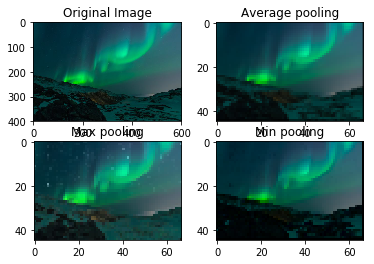

In [3]:

from skimage.measure import block_reduce
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
!wget https://www.w3schools.com/w3css/img_lights.jpg
img = imread('img_lights.jpg')
mean_pool=block_reduce(img, block_size=(9,9,1), func=np.mean)
max_pool=block_reduce(img, block_size=(9,9,1), func=np.max)
min_pool=block_reduce(img, block_size=(9,9,1), func=np.min)

plt.figure(1)
plt.subplot(221)
imgplot = plt.imshow(img.astype(np.uint8))
plt.title('Original Image')

plt.subplot(222)
imgplot3 = plt.imshow(mean_pool.astype(np.uint8))
plt.title('Average pooling')

plt.subplot(223)
imgplot1 = plt.imshow(max_pool.astype(np.uint8))
plt.title('Max pooling')

plt.subplot(224)
imgplot1 = plt.imshow(min_pool.astype(np.uint8))
plt.title('Min pooling')

plt.show()

Using TensorFlow backend.
W0805 11:35:36.225509 140326536898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 11:35:36.261670 140326536898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 11:35:36.268840 140326536898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0805 11:35:36.280328 140326536898432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0805 11:35:36.283315 14032653689

Text(0.5, 1.0, 'Avg pooling')

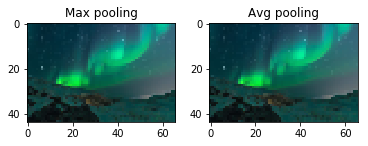

In [4]:
from keras.layers import *
from keras.models import *
inp = Input(img.shape)
out_max = MaxPooling2D(pool_size=(9, 9))(inp)
                   
model_pool = Model(inp, out_max)
out_maxpool = model_pool.predict(np.expand_dims(img, 0))


plt.figure(1)
plt.subplot(221)
imgplot1 = plt.imshow(out_maxpool[0].astype(np.uint8))
plt.title('Max pooling')


out_avg = AveragePooling2D(pool_size=(9, 9))(inp)
                   
model_avg = Model(inp, out_avg)
out_avg = model_pool.predict(np.expand_dims(img, 0))


plt.subplot(222)
imgplot2 = plt.imshow(out_avg[0].astype(np.uint8))
plt.title('Avg pooling')

__Global Average Pooling (GAP)__
Paper: https://arxiv.org/pdf/1312.4400.pdf

In the last few years, experts have turned to global average pooling (GAP) layers to minimize overfitting by reducing the total number of parameters in the model. Similar to max pooling layers, GAP layers are used to reduce the spatial dimensions of a three-dimensional tensor. However, GAP layers perform a more extreme type of dimensionality reduction, where a tensor with dimensions h×w×d is reduced in size to have dimensions 1×1×d. GAP layers reduce each h×w feature map to a single number by simply taking the average of all hw values.

![GAP](https://alexisbcook.github.io/assets/global_average_pooling.png)


https://adventuresinmachinelearning.com/global-average-pooling-convolutional-neural-networks/

The convolutional neural network starts with a series of convolutional (and, potentially, pooling) layers which create feature maps which represent different components of the input images. The fully connected layers at the end then “interpret” the output of these features maps and make category predictions. However, as with many things in the fast moving world of deep learning research, this practice is starting to fall by the wayside in favor of something called Global Average Pooling (GAP). 

![GAP_not_Dense](https://i2.wp.com/adventuresinmachinelearning.com/wp-content/uploads/2019/05/Global-Average-Pooling-full-network.png?resize=1130%2C317&ssl=1)

The GAP layer transforms the dimensions from (7, 7, 64) to (1, 1, 64) by performing the averaging across the 7 x 7 channel values. Global Average Pooling has the following advantages over the fully connected final layers paradigm:

- The removal of a large number of trainable parameters from the model. Fully connected or dense layers have lots of parameters. A 7 x 7 x 64 CNN output being flattened and fed into a 500 node dense layer yields 1.56 million weights which need to be trained. Removing these layers speeds up the training of your model.
- The elimination of all these trainable parameters also reduces the tendency of over-fitting, which needs to be managed in fully connected layers by the use of dropout.
- The authors argue in the original paper that removing the fully connected classification layers forces the feature maps to be more closely related to the classification categories – so that each feature map becomes a kind of “category confidence map”.
- Finally, the authors also argue that, due to the averaging operation over the feature maps, this makes the model more robust to spatial translations in the data. In other words, as long as the requisite feature is included / or activated in the feature map somewhere, it will still be “picked up” by the averaging operation.






## Why downsample feature maps this way? 
Why not remove the max-pooling layers and keep fairly large feature maps all the way up? Let’s look at the a conv_net without any pooling

- It isn’t ___conducive to learning a spatial hierarchy of features___. 
Since we don't have any zooming out effect, the final feature map will divide the input input a lot of grids (say 20x20). This means that, the upper layers will be focusing on very small parts of the input image, which is not very different than if we used the original image as a feature!

_We need the features from the last convolution layer to contain information about the totality of the input._

- The final feature map has say 22 × 22 × 64 = 30,976 total coefficients per sample.
___This is huge___. If you were to flatten it to stick a Dense layer of size 512 on top,
that layer would have 15.8 million parameters. 

_This is far too large for such a small model and would result in intense overfitting._

In short, the reason to use __downsampling__ is to ___reduce the number of feature-map
coefficients to process__, as well as to ___induce spatial-filter hierarchies by making successive
convolution layers look at increasingly large windows__ (in terms of the fraction of
the original input they cover).

Note that max pooling isn’t the only way you can achieve such downsampling. 
As you already know, you can also use strides in the prior convolution layer. 

And you can use __average pooling__ instead of max pooling, where each local input patch is transformed by taking the average value of each channel over the patch, rather than the max. 
But max pooling tends to work better than these alternative solutions. 

In a nutshell, the reason is that features tend to encode the spatial presence of some pattern or concept over the different tiles of the feature map (hence, the term feature map), and __it’s more informative to look at the maximal presence of different features than at their average presence__. 

So the most reasonable subsampling strategy is to first produce dense maps of features (via unstrided convolutions) and then look at the maximal activation of the features over small patches, rather than looking at sparser windows of
the inputs (via strided convolutions) or averaging input patches, which could cause you to miss or dilute feature-presence information.



# CAMVID
[CAMVID](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/) is dataset by Cambridge 
_"The Cambridge-driving Labeled Video Database (CamVid) is the first collection of videos with object class semantic labels, complete with metadata. The database provides ground truth labels that associate each pixel with one of 32 semantic classes."_

It has 701 RGB images (960x720), and their corresponding ground truth masks.
It has 32 classes, where each pixel is labeled according to 1 of 32 colors. This is called per-pixel semantic segmentation (vs. instance segmentation as described above).

The colors mapping can be found in a separate [file](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/label_colorsSorted.txt).

The ground truth are represented as colored images, where each pixel color corresponds to a class according to the mapping in the file.

To generate the masks for training, you need to perform this mapping yourself. Once done, you can save them as npy files.


The recorded data is split into videos, you can download one of the sequences
# [CamSeq01](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamSeq01/)

This has only 101 frames

In [5]:
!wget http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamSeq01/CamSeq01.zip

--2019-08-05 11:35:43--  http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamSeq01/CamSeq01.zip
Resolving mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)... 129.169.82.147
Connecting to mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)|129.169.82.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94535380 (90M) [application/zip]
Saving to: ‘CamSeq01.zip’

CamSeq01.zip        100%[===================>]  90.16M  2.58MB/s    in 39s     

2019-08-05 11:36:22 (2.29 MB/s) - ‘CamSeq01.zip’ saved [94535380/94535380]



In [6]:
!unzip CamSeq01.zip -d CAMVID/

Archive:  CamSeq01.zip
  inflating: CAMVID/0016E5_07977_L.png  
  inflating: CAMVID/0016E5_07979_L.png  
  inflating: CAMVID/0016E5_07981_L.png  
  inflating: CAMVID/0016E5_07983_L.png  
  inflating: CAMVID/0016E5_07985_L.png  
  inflating: CAMVID/0016E5_07987_L.png  
  inflating: CAMVID/0016E5_07989_L.png  
  inflating: CAMVID/0016E5_07991_L.png  
  inflating: CAMVID/0016E5_07993_L.png  
  inflating: CAMVID/0016E5_07995_L.png  
  inflating: CAMVID/0016E5_07997_L.png  
  inflating: CAMVID/0016E5_07999_L.png  
  inflating: CAMVID/0016E5_08001_L.png  
  inflating: CAMVID/0016E5_08003_L.png  
  inflating: CAMVID/0016E5_08005_L.png  
  inflating: CAMVID/0016E5_08007_L.png  
  inflating: CAMVID/0016E5_08009_L.png  
  inflating: CAMVID/0016E5_08011_L.png  
  inflating: CAMVID/0016E5_08013_L.png  
  inflating: CAMVID/0016E5_08015_L.png  
  inflating: CAMVID/0016E5_08017_L.png  
  inflating: CAMVID/0016E5_08019_L.png  
  inflating: CAMVID/0016E5_08021_L.png  
  inflating: CAMVID/0016E5_08023_L

In [7]:
import os
len(os.listdir('CAMVID/'))

204

To get all the files, you can get the labels (masks images) from this [link](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/LabeledApproved_full.zip)

In [8]:
!wget http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/LabeledApproved_full.zip

--2019-08-05 11:36:25--  http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/LabeledApproved_full.zip
Resolving mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)... 129.169.82.147
Connecting to mi.eng.cam.ac.uk (mi.eng.cam.ac.uk)|129.169.82.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16567585 (16M) [application/zip]
Saving to: ‘LabeledApproved_full.zip’

LabeledApproved_ful 100%[===================>]  15.80M  13.6MB/s    in 1.2s    

2019-08-05 11:36:27 (13.6 MB/s) - ‘LabeledApproved_full.zip’ saved [16567585/16567585]



In [9]:
!unzip LabeledApproved_full.zip -d LabeledApproved_full

Archive:  LabeledApproved_full.zip
  inflating: LabeledApproved_full/0001TP_006690_L.png  
  inflating: LabeledApproved_full/0001TP_006720_L.png  
  inflating: LabeledApproved_full/0001TP_006750_L.png  
  inflating: LabeledApproved_full/0001TP_006780_L.png  
  inflating: LabeledApproved_full/0001TP_006810_L.png  
  inflating: LabeledApproved_full/0001TP_006840_L.png  
  inflating: LabeledApproved_full/0001TP_006870_L.png  
  inflating: LabeledApproved_full/0001TP_006900_L.png  
  inflating: LabeledApproved_full/0001TP_006930_L.png  
  inflating: LabeledApproved_full/0001TP_006960_L.png  
  inflating: LabeledApproved_full/0001TP_006990_L.png  
  inflating: LabeledApproved_full/0001TP_007020_L.png  
  inflating: LabeledApproved_full/0001TP_007050_L.png  
  inflating: LabeledApproved_full/0001TP_007080_L.png  
  inflating: LabeledApproved_full/0001TP_007110_L.png  
  inflating: LabeledApproved_full/0001TP_007140_L.png  
  inflating: LabeledApproved_full/0001TP_007170_L.png  
  inflating: 

In [10]:
len(os.listdir('LabeledApproved_full/'))

701

However, to get the corresponding images, you need to run a script to extract the frames from few video sequences (like CamSeq01)

Under this nice [repo](https://github.com/GeorgeSeif/Semantic-Segmentation-Suite), the author has already done that for us, and split the data into train/val/test already. We're going to use that.

In [11]:
!git clone https://github.com/GeorgeSeif/Semantic-Segmentation-Suite.git
  

Cloning into 'Semantic-Segmentation-Suite'...
remote: Enumerating objects: 3635, done.
remote: Total 3635 (delta 0), reused 0 (delta 0), pack-reused 3635
Receiving objects: 100% (3635/3635), 874.40 MiB | 40.32 MiB/s, done.
Resolving deltas: 100% (461/461), done.
Checking out files: 100% (1451/1451), done.


In [0]:
from pathlib import Path
data_path = Path('Semantic-Segmentation-Suite/CamVid')

In [13]:
print('Number of train frames: ' + str(len(os.listdir(data_path/'train'))))
print('Number of train labels: ' + str(len(os.listdir(data_path/'train_labels'))))
print('Number of val frames: ' + str(len(os.listdir(data_path/'val'))))
print('Number of val labels: ' + str(len(os.listdir(data_path/'val_labels'))))
print('Number of test frames: ' + str(len(os.listdir(data_path/'test'))))
print('Number of test labels: ' + str(len(os.listdir(data_path/'test_labels'))))
print('Total frames: ' + str(len(os.listdir(data_path/'train')) + len(os.listdir(data_path/'val')) + len(os.listdir(data_path/'test'))))

Number of train frames: 421
Number of train labels: 421
Number of val frames: 112
Number of val labels: 112
Number of test frames: 168
Number of test labels: 168
Total frames: 701


Now, let's see which classes we have. This can be found in the original CAMVID [text file](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/data/label_colors.txt). However, under the same repo, the author has dumped it into csv which we will use.

In [0]:
import pandas as pd
classes = pd.read_csv(data_path / 'class_dict.csv', index_col =0)

In [15]:
classes

,r,g,b
name,,,
Animal,64,128,64
Archway,192,0,128
Bicyclist,0,128,192
Bridge,0,128,64
Building,128,0,0
Car,64,0,128
CartLuggagePram,64,0,192
Child,192,128,64
Column_Pole,192,192,128


In [16]:
n_classes = len(classes)
n_classes

32

This data frame maps the class names to colors.

To access the colors, we can index the dataframe with its row index name using the .loc operation.


In [17]:
import numpy as np
classes.loc['Wall', :]

r     64
g    192
b      0
Name: Wall, dtype: int64

But this will just give us a pandas.Series object. To get it as normal array we need to cast:

In [18]:
np.array(classes.loc['Wall', :])

array([ 64, 192,   0])

Or as list:

In [19]:
list(classes.loc['Wall', :])

[64, 192, 0]

To get list of class names, we can just use .index

In [20]:
classes.index

Index(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight',
       'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void',
       'Wall'],
      dtype='object', name='name')

If we want to map the class name to index, we can use enumerate

In [21]:
for i, v in enumerate(classes.index):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


Now we are ready to create a map from class name to color

In [0]:
classes_dict = {}
for cl in classes.index:
  classes_dict[cl] = list(classes.loc[cl, :])

We could use dict comprehensions:

In [0]:
cls2rgb = {cl:list(classes.loc[cl, :]) for cl in classes.index}

In [24]:
cls2rgb

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'SUVPickupTruck': [64, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

Later, we will need to map a color to a class index (given a color generate an index)

In [0]:
# We need a mapping from rgb to class label since this is out y target
if(view):# we cannot hash list
  inv_classes_dict = {}
  for cl in classes.index:
    inv_classes_dict[list(classes.loc[cl, :])] = cl 

The code above will generate an error, because we cannot use a list as a hash key.
As a workaround, we can convert it into str

Again, this can be done with list comprehensions

In [0]:
#rgb2cls = {str(list(classes.loc[cl, :])):cl for cl in classes.index}
rgb2cls = {str(v):k for k,v in cls2rgb.items()}

In [27]:
rgb2cls

{'[0, 0, 0]': 'Void',
 '[0, 0, 192]': 'Sidewalk',
 '[0, 0, 64]': 'TrafficCone',
 '[0, 128, 192]': 'Bicyclist',
 '[0, 128, 64]': 'Bridge',
 '[0, 64, 64]': 'TrafficLight',
 '[128, 0, 0]': 'Building',
 '[128, 0, 192]': 'LaneMkgsDriv',
 '[128, 128, 0]': 'Tree',
 '[128, 128, 128]': 'Sky',
 '[128, 128, 192]': 'RoadShoulder',
 '[128, 128, 64]': 'Misc_Text',
 '[128, 64, 128]': 'Road',
 '[128, 64, 64]': 'OtherMoving',
 '[192, 0, 128]': 'Archway',
 '[192, 0, 192]': 'MotorcycleScooter',
 '[192, 0, 64]': 'LaneMkgsNonDriv',
 '[192, 128, 128]': 'SignSymbol',
 '[192, 128, 192]': 'Truck_Bus',
 '[192, 128, 64]': 'Child',
 '[192, 192, 0]': 'VegetationMisc',
 '[192, 192, 128]': 'Column_Pole',
 '[192, 64, 128]': 'Train',
 '[64, 0, 128]': 'Car',
 '[64, 0, 192]': 'CartLuggagePram',
 '[64, 0, 64]': 'Tunnel',
 '[64, 128, 192]': 'SUVPickupTruck',
 '[64, 128, 64]': 'Animal',
 '[64, 192, 0]': 'Wall',
 '[64, 192, 128]': 'ParkingBlock',
 '[64, 64, 0]': 'Pedestrian',
 '[64, 64, 128]': 'Fence'}

To use this map, we need to convert the rgb list into str every time:

In [28]:
rgb2cls[str([64,64,128])]

'Fence'

But we won't use the class names, what we need is their index.
Let's create this mapping and its reverse:

In [0]:
cls2idx = {cl:idx for idx,cl in enumerate(classes.index)}# We need the mapping from class name to index

In [30]:
cls2idx

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'SUVPickupTruck': 22,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [0]:
idx2cls = {v:k for k, v in rgb2cls.items()}

Now we can use the rgb2cls and cls2idx to create the rgb2idx map:

In [0]:
rgb2idx={rgb:cls2idx[cl] for rgb, cl in rgb2cls.items()}# Will be needed to convert the png into class labels

In [33]:
rgb2idx

{'[0, 0, 0]': 30,
 '[0, 0, 192]': 19,
 '[0, 0, 64]': 23,
 '[0, 128, 192]': 2,
 '[0, 128, 64]': 3,
 '[0, 64, 64]': 24,
 '[128, 0, 0]': 4,
 '[128, 0, 192]': 10,
 '[128, 128, 0]': 26,
 '[128, 128, 128]': 21,
 '[128, 128, 192]': 18,
 '[128, 128, 64]': 12,
 '[128, 64, 128]': 17,
 '[128, 64, 64]': 14,
 '[192, 0, 128]': 1,
 '[192, 0, 192]': 13,
 '[192, 0, 64]': 11,
 '[192, 128, 128]': 20,
 '[192, 128, 192]': 27,
 '[192, 128, 64]': 7,
 '[192, 192, 0]': 29,
 '[192, 192, 128]': 8,
 '[192, 64, 128]': 25,
 '[64, 0, 128]': 5,
 '[64, 0, 192]': 6,
 '[64, 0, 64]': 28,
 '[64, 128, 192]': 22,
 '[64, 128, 64]': 0,
 '[64, 192, 0]': 31,
 '[64, 192, 128]': 15,
 '[64, 64, 0]': 16,
 '[64, 64, 128]': 9}

In [34]:
rgb2idx[str([64,64,128])]

9

We have a small issue, when we deal with image pixels, we will face floats. Since we use the str of the list as the key, we will have key errors:

In [0]:
if(view):
  rgb2idx[str([64.0,64.0,128.0])]# Key error since the mapping is int not float

What we need is to convert to int:

In [0]:
if(view):
  rgb2idx[str(int([64.0,64.0,128.0]))]# Wrong way to convert to int

We want to run int() on every list entry. We can use map built in function

In [0]:
if(view):
  rgb2idx[str(map(int, [64.0,64.0,128.0]))]#map is a generator that needs to be consumed

But map is a generator

In [38]:
for i in map(int, [64.0,64.0,128.0]):
  print(i)

64
64
128


Better use list comprehension

In [39]:
# Better use list comprehension
p = [64.0,64.0,128.0]
rgb2idx[str([int(pf) for pf in p])]

9

## Now let's visualize and explore some samples:

In [40]:
str(data_path)

'Semantic-Segmentation-Suite/CamVid'

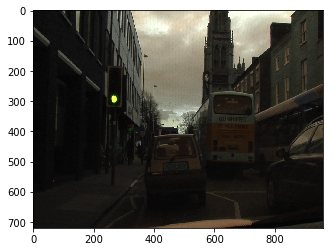

In [41]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import  cv2_imshow

#img = cv2.imread(data_path/'train/0001TP_006690.png')
img = cv2.imread(str(data_path) + '/train/0001TP_006690.png')
plt.imshow(img)


In [42]:
img.shape

(720, 960, 3)

In [43]:
import numpy as np
np.max(img)# 255, so image is not scaled

255

Let's have a look on the masks (the ground truth)

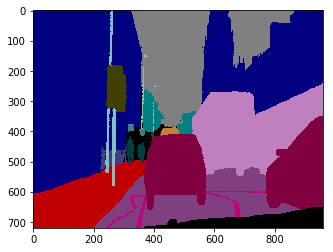

In [44]:
mask = cv2.imread(str(data_path) + '/train_labels/0001TP_006690_L.png')
plt.imshow(mask)

In [45]:
mask.shape

(720, 960, 3)

As you can see the masks are just colors (L,W,3).
What we actually want is a (L,W) matrix, with each value is from 0 to 31 representing the 32 class labels.

In [46]:
mask# Colors are different from the classes dict! Because the order is BGR not RGB when using cv2.imread: https://stackoverflow.com/questions/46898979/how-to-check-the-channel-order-of-an-image

array([[[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128],
        ...,
        [  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 128]],

       ...,

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[192,   0,   0],
        [192,   0,   0],
        [192,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

Colors are different from the colors in cls2rgb! Because the order is BGR not RGB when using cv2.imread: https://stackoverflow.com/questions/46898979/how-to-check-the-channel-order-of-an-image

If you want to get the same order as in the color mapping of CAMVID, use the cv converted

In [0]:
mask = cv2.cvtColor((mask).astype(np.uint8), cv2.COLOR_BGR2RGB)# If you want to get the same order as in the color mapping of CAMVID, use the cv converted

In [48]:
mask

array([[[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       [[128,   0,   0],
        [128,   0,   0],
        [128,   0,   0],
        ...,
        [128,   0,   0],
        [128,   0,   0],
        [128,   0,   0]],

       ...,

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

Now if you plot the mask again, you will see different colors. For example the red and blue are reversed than before:

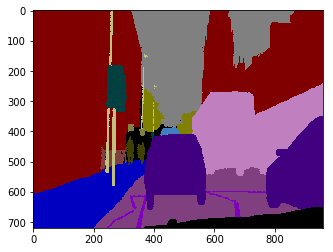

In [49]:
plt.imshow(mask)

Another solution is to use load_image from keras which uses RGB (it uses PIL under the hood) unlike cv2.imread

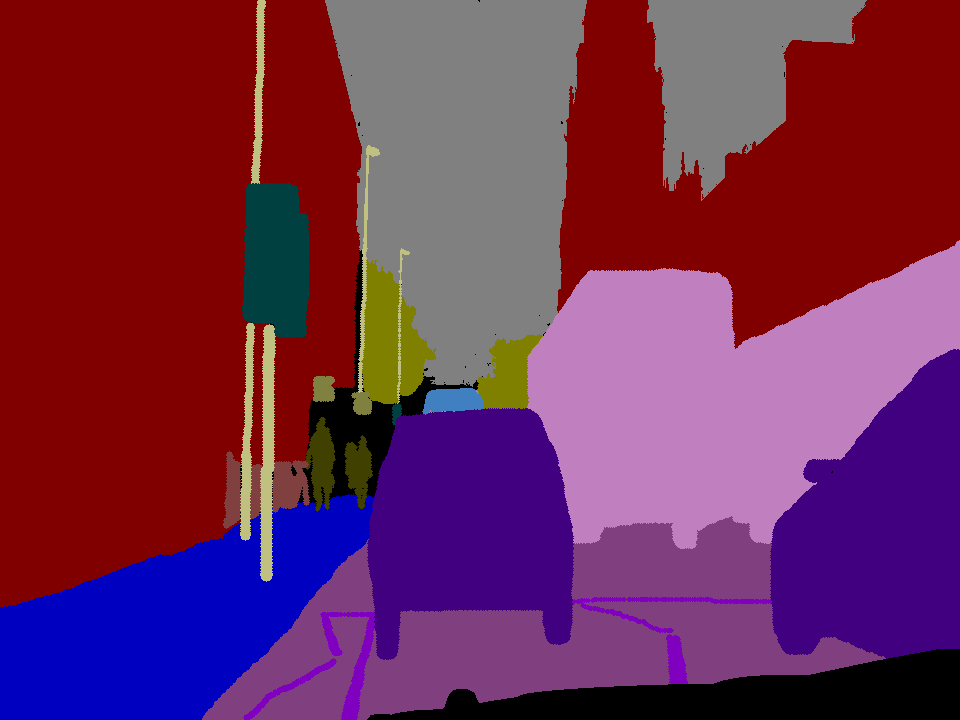

In [50]:
from keras.preprocessing.image import load_img
mask = load_img(str(data_path) + '/train_labels/0001TP_006690_L.png')
mask

In [0]:
mask = np.array(mask)# Now colors are the same as in the dict, since keras load_img uses RGB order.

In [52]:
mask.shape

(720, 960, 3)

Now to perform the mapping, we want to apply a mapping using rgb2idx on every pixel.
For that we can use numpy function `apply_along_axis` which applies a given function.


In [0]:
# We need to map the (720, 960, 3) mask into (720, 960) each having the class index as in classes dict
def map_pixel_to_class(p):
  return rgb2idx[str([int(pf) for pf in list(p)])]

new_mask = np.apply_along_axis(map_pixel_to_class, 2, mask)

In [54]:
new_mask

array([[ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       [ 4,  4,  4, ...,  4,  4,  4],
       ...,
       [19, 19, 19, ..., 30, 30, 30],
       [19, 19, 19, ..., 30, 30, 30],
       [19, 19, 19, ..., 30, 30, 30]])

In [55]:
new_mask.shape

(720, 960)

Now we can take a look on the mask after the mapping. We try to view it as different levels on grey scale.

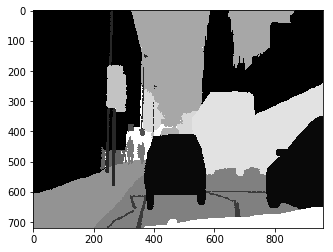

In [56]:
plt.imshow(new_mask, cmap='gray')

To make sure we performed the mapping correctly, let's try to do the reverse mapping.
Note that, we will need this later when we get predictions from our network and we want to view it as RGB mask like the original data labels.

First, we want to create the reverse mapping from class index to RGB color. Again we use dict comprehensions:

In [57]:
idx2rgb={idx:np.array(eval(rgb)) for rgb, idx in rgb2idx.items()}
idx2rgb

{0: array([ 64, 128,  64]),
 1: array([192,   0, 128]),
 2: array([  0, 128, 192]),
 3: array([  0, 128,  64]),
 4: array([128,   0,   0]),
 5: array([ 64,   0, 128]),
 6: array([ 64,   0, 192]),
 7: array([192, 128,  64]),
 8: array([192, 192, 128]),
 9: array([ 64,  64, 128]),
 10: array([128,   0, 192]),
 11: array([192,   0,  64]),
 12: array([128, 128,  64]),
 13: array([192,   0, 192]),
 14: array([128,  64,  64]),
 15: array([ 64, 192, 128]),
 16: array([64, 64,  0]),
 17: array([128,  64, 128]),
 18: array([128, 128, 192]),
 19: array([  0,   0, 192]),
 20: array([192, 128, 128]),
 21: array([128, 128, 128]),
 22: array([ 64, 128, 192]),
 23: array([ 0,  0, 64]),
 24: array([ 0, 64, 64]),
 25: array([192,  64, 128]),
 26: array([128, 128,   0]),
 27: array([192, 128, 192]),
 28: array([64,  0, 64]),
 29: array([192, 192,   0]),
 30: array([0, 0, 0]),
 31: array([ 64, 192,   0])}

This time we have a (L,W) mask and we want to map it to color mask (L,W,3)

In [0]:
# Map the idx back to rgb
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(new_mask, -1))

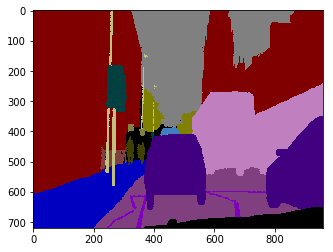

In [59]:
plt.imshow(rgb_mask)

The NN model classification output is usually produced from a softmax. The softmax produces a probability score over n_classes output. If we perform max over this output, we have a vector of size n_classesx1.

As described earlier we have LxW outputs, one per pixel, each representing a class, which we called a class heatmap. In NN world, this output is produced from LxW softmax operations over each pixel, so we have LxWxn_classes scores.

The ground truth for this output must also have LxWxn_classes, where the encoding of class label is done via One-Hot-Encoding (OHE).

In theory, the LxW mask is enough to train a NN model, since we can use sparse_categorical_cross_entropy. But for reasons that will appear later, this won't be possible.

So we will try now to produce the LxWxn_classes mask:

In [0]:
# We need to map the (720, 960, 3) mask into (720, 960, n_classes) each having the class index as OHE
def map_pixel_to_OHE_class(p):
  OHE = np.zeros(n_classes)
  OHE[rgb2idx[str([int(pf) for pf in list(p)])]] = 1
  return OHE

new_mask = np.apply_along_axis(map_pixel_to_OHE_class, 2, mask)

In [61]:
new_mask.shape

(720, 960, 32)

Again, let's map back and see what we get:

In [0]:
def map_OHE_to_pixel(p):
  
  return idx2rgb[np.where(p==1)[0][0]]

rgb_mask = np.apply_along_axis(map_OHE_to_pixel, -1, new_mask)

In [63]:
rgb_mask.shape

(720, 960, 3)

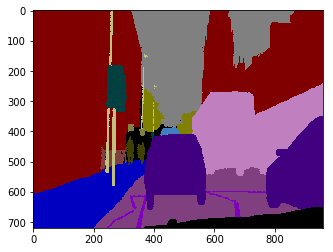

In [64]:
plt.imshow(rgb_mask)

In [65]:
'''
masks = []
train_labels_path = str(data_path) + '/train_labels/'
for img in os.listdir(train_labels_path):
  print(os.path.join(train_labels_path,img))
  mask = load_img(os.path.join(train_labels_path,img))
  new_mask = np.apply_along_axis(map_pixel_to_OHE_class, 2, mask)
  masks.append(new_mask)
'''  

"\nmasks = []\ntrain_labels_path = str(data_path) + '/train_labels/'\nfor img in os.listdir(train_labels_path):\n  print(os.path.join(train_labels_path,img))\n  mask = load_img(os.path.join(train_labels_path,img))\n  new_mask = np.apply_along_axis(map_pixel_to_OHE_class, 2, mask)\n  masks.append(new_mask)\n"

# Model
__U-Net__

We will investigate a famous model called U-Net

![U Net](https://lmb.informatik.uni-freiburg.de/Publications/2015/RFB15a/u-net-architecture.png)

It uses the same architecture as the encoder decoder. However it adds a well known trick called skip connections. Skip connections was first introduced in ResNet. It roots also in the recurrent neural network literature with LSTMs and GRUs.

The main issue skip connections is trying to solve is the very deep nets. Or in recurrence, the very long time dependency (back prop through time). With the increased network depth, we face the problem of vanishing gradients, due to the chain rule effect, the gradients are reduced a lot that they could vanish, and no weight updates is possible.

Skip connections enables an alternative path to the gradients:

`x2=f(x1) + x1`

This is called a residual block

![Res](https://qph.fs.quoracdn.net/main-qimg-93cef3d493d15b211aba8db3fd536b82)

In this way, if the gradient of F(x) vanished, we have an identity gradient of x that can still flow.


Also, U-Net uses upsampling as we discussed earlier.




## Sparse categorical model
Here we assume the output is LxWxn_classes while the GT is LxW. In kerase, the GT is expanded on the fly if we specify the loss as sparse_categorical_cross_entropy.

However, for the sparse case, the model output is the same LxWxn_classes, but the loss is sparse_categorical_cross_entropy.
Doing this, enables to feed y_train as LxW not LxWxn_classes, and keras takes care internally of the exansion.

## OHE

But what if we just leave the output and GT as (n_samples, L, W, n_classes)?

We test this option because recent keras versions support that as we will see.

## OHE Flat
Here we use the normal categorical cross entropy loss

However, in keras, the GT convention is either (n_samples, n_classes) or (n_samples, n_time_steps, n_classes)

In our case we have the GT as (n_samples, L, W, n_classes), so 4 dims.

What we can do is to use the time dim and flatten the GT as  (n_samples, L*W, n_classes) which is the same as the 3 dims case

In [0]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(n_classes, pretrained_weights = None,input_size = (256,256,3), flat=False, ohe=False):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    #conv10 = Conv2D(n_classes, (1,1), activation = 'softmax')(conv9)
    conv10 = Conv2D(n_classes, (1,1), padding='same')(conv9)
    if flat:
      output_layer = Reshape((256*256,n_classes))(conv10)
    else:
      output_layer = conv10
    output_layer = Activation('softmax')(output_layer)
     

    model = Model(input = inputs, output = output_layer)

    if ohe:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    else:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model



In [209]:
# Sparse model
model = unet(n_classes)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_93 (Conv2D)              (None, 256, 256, 64) 1792        input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_93[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_18 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_94[0][0]                  
__________________________________________________________________________________________________
conv2d_95 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


In [210]:
# OHE model
model_ohe = unet(n_classes, ohe=True)
model_ohe.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 256, 256, 64) 1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_116[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_117[0][0]                 
__________________________________________________________________________________________________
conv2d_118

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


In [211]:
# OHE model
model_ohe_flat = unet(n_classes, flat=True, ohe=True)
model_ohe_flat.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_139 (Conv2D)             (None, 256, 256, 64) 1792        input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_140 (Conv2D)             (None, 256, 256, 64) 36928       conv2d_139[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_26 (MaxPooling2D) (None, 128, 128, 64) 0           conv2d_140[0][0]                 
__________________________________________________________________________________________________
conv2d_141

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


# NPY
One option is to perform the above operation over all the data files masks, and load them all in RAM.



You must sort the files, otherwise you get wrong GT to mask mapping

You don't need to get the same file name, in the 2 folders, as we can sort by name. The only difference in img and mask name is _L.png

In [0]:
def load_CAMVID(data_type='train', enc='ohe', shape='normal'):
  img_path = str(data_path) + '/' + data_type + '/'
  labels_path = str(data_path) + '/' + data_type + '_labels/'
  # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
  x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
  if(enc=='ohe'):
    y = np.array([np.apply_along_axis(map_pixel_to_OHE_class, -1, np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
  elif(enc=='sparse_cat'):
    y = np.array([np.apply_along_axis(map_pixel_to_class, -1, np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
  if(shape == 'flat'):
    y = np.reshape(y.shape[0], y.shape[1]*y.shape[2])
    y = np.expand_dims(y, axis=-1)
  return x, y
  

In [0]:
x_train, y_train = load_CAMVID(data_type='train')
#x_test, y_test = load_CAMVID(data_type='test')# Don't load test for RAM consumption
x_val, y_val = load_CAMVID(data_type='val')


In [150]:
print(x_train.shape)
print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(421, 256, 256, 3)
(421, 256, 256, 32)
(112, 256, 256, 3)
(112, 256, 256, 32)


Doing so, will required a lot of RAM --> 421x960x720x32x4bytes is around 34GB unless we dont resize when loading the imag using load_img

## So what we can do?
__We can use data loaders__
We can load the data batch by batch as we progress in training.

Now we have 2 options:

1- As we load every batch, we perform the mask transformation (rgb2idx) on the fly.
This option consumes less time during data loading, but increase the epoch time significantly.

2- Perform all the mask transformation offline, and save the masks (LxWxn_classes) as npy files.
This option is time consuming, but only done once.

Since we only have 701 frames, we go with option 2.

In keras we have a mechanism that enables data loading from files on desk using ImageDataGenerator.
The ImageDataGenerator class serves for two purposes:

1- Data augmentation: as you can perform operations to augment the data as you load it. In this case your data size is not static (701), but it is defined by the steps_per_epoch which defines how many augmented frames you produce for every epoch

2- Data loading: you may choose not to perform any augmentation operations, in which case the ImageDataGenerator consutructor is empty. To load the data from disk with certain batch size you call flow_from_directory on the ImageDataGenerator

# Train

## Fit on NPY
If we could load all the data in RAM, then we are ready to train directly. 
But unfortunately, in our case this is not possible.

Note that, we want to operate on 256x256 images while the size on disk is 960x720. So in theory if we could resize and save the small images on disk, this option would have been possible. However, we won't investigate this here.

That's why we used load_img with target_size-256

__Notice, how the epoch is much faster__

In [153]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model_ohe.fit(x=x_train, 
              y=y_train,
              validation_data=(x_val, y_val),
              batch_size=8,# 32 gives OOM sometimes
              epochs=100)

Train on 421 samples, validate on 112 samples
Epoch 1/100
421/421 [==============================] - 47s 111ms/step - loss: 1.2353 - acc: 0.6275 - val_loss: 1.2146 - val_acc: 0.6709
Epoch 2/100
421/421 [==============================] - 41s 97ms/step - loss: 1.1004 - acc: 0.6781 - val_loss: 1.1578 - val_acc: 0.6957
Epoch 3/100
421/421 [==============================] - 41s 97ms/step - loss: 0.9951 - acc: 0.7243 - val_loss: 1.2000 - val_acc: 0.6839
Epoch 4/100
421/421 [==============================] - 42s 99ms/step - loss: 0.9184 - acc: 0.7399 - val_loss: 0.8835 - val_acc: 0.7630
Epoch 5/100
 48/421 [==>...........................] - ETA: 33s - loss: 0.8481 - acc: 0.7559

KeyboardInterrupt: ignored

# Let's try on some samples

In [0]:
img = x_train[100]

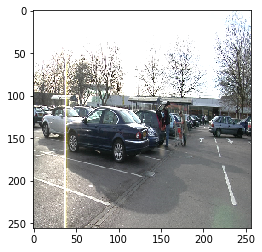

In [157]:
plt.imshow(img)

In [0]:
pred_mask = model_ohe.predict(np.expand_dims(img, 0))

The raw output is just the probabilites.
To get a class index, we can use argmax:

In [0]:
pred_mask = np.argmax(pred_mask, axis=-1)

In [190]:
pred_mask.shape

(1, 256, 256)

In [161]:
pred_mask[0].shape

(256, 256)

In [191]:
pred_mask = pred_mask[0]
#pred_mask = np.reshape(pred_mask[0], (256,256)) # Reshape only if you use the flat model. O.w. you dont need.
pred_mask.shape

(256, 256)

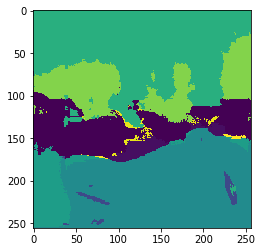

In [163]:
plt.imshow(pred_mask)

Now we need to map the predicted class index back to rgb to be able to visualize it:

In [0]:
# Map the idx back to rgb
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))

In [193]:
rgb_mask.shape

(256, 256, 3)

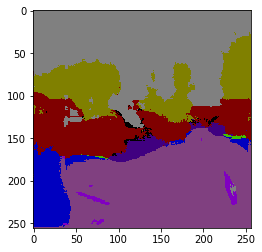

In [166]:
plt.imshow(rgb_mask)

As you can see, the colors are already correct (RGB), since the model is trained on the correct color mapping

Let's compare to the GT mask

In [0]:
gt_img_ohe = y_train[100]
gt_img_ohe = np.argmax(gt_img_ohe, axis=-1)

In [168]:
gt_img_ohe.shape

(256, 256)

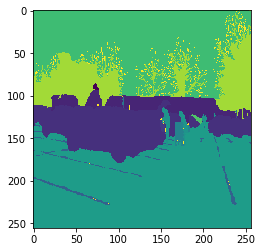

In [169]:

plt.imshow(gt_img_ohe) 


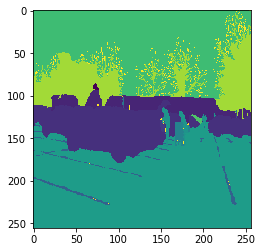

In [170]:

plt.imshow((gt_img_ohe).astype(np.uint8))# Without the cast you get wrong colors. 


In [0]:
gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))


In [172]:
gt_mask.shape

(256, 256, 3)

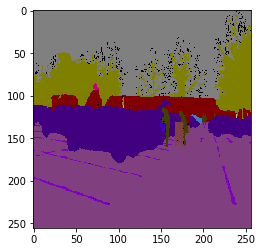

In [173]:
plt.imshow(gt_mask)

Side note, if you are on colab and using cv2_imshow, you will get inverted color mapping:

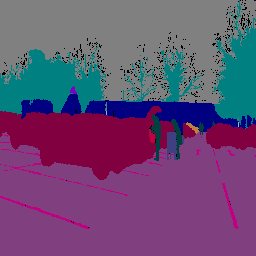

In [181]:
from google.colab.patches import  cv2_imshow
cv2_imshow(gt_mask)# cv2_imshow takes care of clipping. But cv2_imshow uses BGR convention, so you get different view

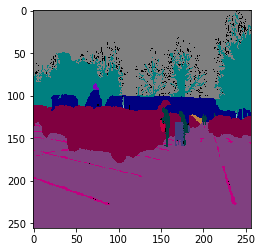

In [183]:
plt.imshow(cv2.cvtColor((gt_mask).astype(np.uint8), cv2.COLOR_BGR2RGB))# To get the same color mapping as in cv2_imshow, we need to convert it first.
# gt_img is loaded with load_image with keras inside the data generator, so it's already RGB. If you want to see it like cv2_imshow convert first.

In [177]:
gt_mask# Uses RGB convention since its loaded with keras load_image

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[128,  64, 128],
        [128,  64, 128],
        [128,  64, 128],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]],

       [[128,  64, 128],
        [128,  64, 128],
        [128,  64, 128],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]],

       [[128,  64, 128],
        [128,  64, 128],
        [128,  64, 128],
        ...,
        [128,  64, 128],
        [128,  64, 128],
        [128,  64, 128]]

Let's wrap the above in a function

In [0]:
# img (256,256,3)
# gt_mask: gt_mode=sparse--> (256,256) or ohe --> (256,256,32)
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  plt.figure(1)
  
  # Img
  plt.subplot(311)
  plt.imshow(img)
  
  # Predict
  pred_mask = model_ohe.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
  plt.subplot(312)
  plt.imshow(rgb_mask)
              
  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
  plt.subplot(313)
  plt.imshow((gt_mask).astype(np.uint8))
                
  
  

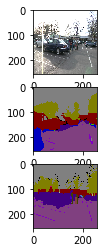

In [202]:
visualize_seg(x_train[100], y_train[100], gt_mode='ohe')

## Sparse categorical classes
In this part we try the sparse OHE encoding of classes

In [215]:
del x_train
del y_train
del x_val
del y_val
#del x_test
#del y_test

NameError: ignored

In [219]:
x_train, y_train = load_CAMVID(data_type='train', enc='sparse_cat')
#x_test, y_test = load_CAMVID(data_type='test', enc='sparse_cat')# Don't load test for RAM consumption
x_val, y_val = load_CAMVID(data_type='val', enc='sparse_cat')

print(x_train.shape)
print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print(x_val.shape)
print(y_val.shape)



(421, 256, 256, 3)
(421, 256, 256)
(112, 256, 256, 3)
(112, 256, 256)


In [217]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit(x=x_train, 
              y=y_train,
              validation_data=(x_val, y_val),
              batch_size=8,# 32 gives OOM sometimes
              epochs=100)

ValueError: ignored

In [0]:
# We need to map the (720, 960, 3) mask into (720, 960) each having the class index as in classes dict
def map_pixel_to_class(p):
  return rgb2idx[str([int(pf) for pf in list(p)])]


def adjust_mask(mask):
  # To transform the mask img into (L,W,n_classes) instead of (L,W,3) since the mask is a colored image
  # However, since we use sparse categorical loss, we dont need OHE, so we dont need (L,W,n_classes), only (L,W)

  
  new_mask = np.apply_along_axis(map_pixel_to_class, -1, mask)
  new_mask = np.reshape(new_mask, (-1,256*256))
  new_mask = np.expand_dims(new_mask, -1)# The model expects (L, W, 1)
  #print(new_mask.shape)
  return new_mask  
  

We won't specify any data augmentation for now.

But if we were to, we need to take care of few things:

1- __Fix the seed__ we dont want to perform an operation on the image different from the mask. But in the same time, we have two generators, one for mask and one for images (as they are different files on disk)

2- __Mask pixel values__ any operation we perform on the mask must not alter the color value of the pixels, otherwise we lose the class information. So what augmentation is possible? transforms like flipping, rotation,...etc. But bilinear resize or blurring is not possible.

3- When speficifying the directory to flow_from_directory, the function assumes every sub-directory corresponds to a class (see cats vs dogs tutorial). If this is not the case, no files are loaded. However, we are not doing image classification this is not applicable. 
To workaround this, we use the train, val, test folders as if they are class folders, using the parameter `classes`

4- __What about the mask transformation (rgb2idx)?__ As we decided, we will perform this on the fly with the data loading. We will try two options:

A- Use the `preprocessing_function`in `ImageDataGenerator`

B- Perform the transformation explictly with a custom generator using `yield`

In [80]:
# Data generator
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    rescale=1./255)
# Some transforms in the mask for data augmentation causes the standard colors to change, so they are not found in the mapping dict.
# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict(#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    preprocessing_function=adjust_mask)# Using label adjustment as part of data generator works but slow. Better to keep it in npy files. 
                                                       # However, if the data is big, there's no other solution as we can't load them all in npy array.

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=4,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=4,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

'''
# We need this generator since we need to call adjust_mask to convert the colored image into a mask, and we cant use preprocessing_function of image data generator since it must return the same shape of the input image
def train_generator_fn(train_generator):
    for (img,mask) in train_generator:
        mask = adjust_mask(mask)
        yield (img, mask)
'''        

Found 421 images belonging to 1 classes.
Found 421 images belonging to 1 classes.


'\n# We need this generator since we need to call adjust_mask to convert the colored image into a mask, and we cant use preprocessing_function of image data generator since it must return the same shape of the input image\ndef train_generator_fn(train_generator):\n    for (img,mask) in train_generator:\n        mask = adjust_mask(mask)\n        yield (img, mask)\n'

In [81]:

model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator,
                    steps_per_epoch=2000,# Remember we dont have constant data size due to augmentation and yield in the generator. If you dont have augmentation and just using flow_from_directory as a data loader, then set this to size/batch_size
                    epochs=5,
                    callbacks=[model_checkpoint])

Epoch 1/5


ValueError: ignored

__What happened?__


We got an error: could not broadcast input array from shape (1,65536,1) into shape (256,256,3)

It seems to be concerned with the mask shape

Let's investigate what our generators give use

In [82]:
next(image_generator)

array([[[[0.8196079 , 0.82745105, 0.75294125],
         [0.8000001 , 0.8078432 , 0.73333335],
         [0.8588236 , 0.86666673, 0.79215693],
         ...,
         [0.54509807, 0.5764706 , 0.5921569 ],
         [0.53333336, 0.5647059 , 0.59607846],
         [0.5529412 , 0.5803922 , 0.62352943]],

        [[0.81568635, 0.8235295 , 0.7411765 ],
         [0.82745105, 0.8352942 , 0.75294125],
         [0.8431373 , 0.85098046, 0.7686275 ],
         ...,
         [0.49411768, 0.5372549 , 0.5372549 ],
         [0.4901961 , 0.5294118 , 0.5411765 ],
         [0.56078434, 0.6       , 0.61960787]],

        [[0.80392164, 0.8117648 , 0.7294118 ],
         [0.77647066, 0.7843138 , 0.7019608 ],
         [0.8588236 , 0.86666673, 0.7843138 ],
         ...,
         [0.39607847, 0.43921572, 0.42352945],
         [0.45098042, 0.49411768, 0.48627454],
         [0.54901963, 0.5882353 , 0.6       ]],

        ...,

        [[0.2784314 , 0.2784314 , 0.2784314 ],
         [0.2784314 , 0.2784314 , 0.2784314 ]

In [0]:
# Error: could not broadcast input array from shape (256,256) into shape (256,256,3)
m = next(mask_generator)# this is because preprocessing_function must return the same shape as image

This is because preprocessing_function must return the same shape as image.

If you take a look on the implementation in /usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py --> batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=self.dtype)

__By broadcast rules: (256,256,1) is broadcasted to (256,256,3)__

But this was not possible

In [0]:
m.shape# in /usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/iterator.py --> batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=self.dtype)
# By broadcast rules: (256,256,1) is broadcasted to (256,256,3)

In [0]:
m1 = np.reshape(m, (-1,256*256,3))

In [0]:
m1.shape

So we cannot use the preprocess_function to adjust the mask

Let's see option B. Now we will explicitly call our function on the returned mask every batch.

But how can we do that?

Previously we used zip on both generators, but we don't have access to their internal opertaion!

What we can do is to create our own generator. But we won't do things from scratch. 

We can keep the basic functionality of ImageDataGenerator (which is data loading from disk for now).

And we create a wrapper generator that _yields_ the loaded image and the adjusted mask:

In [0]:
# Data generator
batch_sz = 4
#https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
# we create two instances with the same arguments

# VI Note: use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
data_gen_args = dict(#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    rescale=1./255)

mask_gen_args = dict()#rotation_range=0.2,
                    #width_shift_range=0.05,
                    #height_shift_range=0.05,
                    #shear_range=0.05,
                    #zoom_range=0.05,
                    #horizontal_flip=True,
                    #fill_mode='nearest',
                    #preprocessing_function=adjust_mask)# This is not possible since the preprocessing_function can only return the same shape as image

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    data_path,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

mask_generator = mask_datagen.flow_from_directory(
    data_path,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

def adjust_batch_mask(mask):
  # To transform the mask img into (L,W,n_classes) instead of (L,W,3) since the mask is a colored image
  # However, since we use sparse categorical loss, we dont need OHE, so we dont need (L,W,n_classes), only (L,W)
  
  new_mask = np.apply_along_axis(map_pixel_to_class, -1, mask)# Since we are passing a complete batch here, the index of pixels is shifted to 4th pos (3)
  return new_mask  

def adjust_batch_OHE_mask(mask):
  # To transform the mask img into (L,W,n_classes) instead of (L,W,3) since the mask is a colored image
  # We need to map the (720, 960, 3) mask into (720, 960, n_classes) each having the class index as OHE
  def map_pixel_to_class(p):
    OHE = np.zeros(n_classes)
    OHE[rgb2idx[str([int(pf) for pf in list(p)])]] = 1
    return OHE    
  new_mask = np.apply_along_axis(map_pixel_to_class, -1, mask)# Since we are passing a complete batch here, the index of pixels is shifted to 4th pos (3)
  return new_mask  

  
# We need this generator since we need to call adjust_mask to convert the colored image into a mask, and we cant use preprocessing_function of image data generator since it must return the same shape of the input image
def train_generator_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_batch_mask(mask)
        new_mask = np.reshape(new_mask, (-1,256*256))
        new_mask = np.expand_dims(new_mask, -1)# The model expects (batch_sz, L, W, 1)        
        yield (img,new_mask)

def train_generator_OHE_flat_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_batch_OHE_mask(mask)
        new_mask = np.reshape(new_mask, (-1,256*256, n_classes))
        #new_mask = np.expand_dims(new_mask, -1)# The model expects (batch_sz, L, W, 1)
        yield (img,new_mask)  
        
def train_generator_OHE_fn():

    for (img,mask) in train_generator:
        new_mask = adjust_batch_OHE_mask(mask)
        #new_mask = np.reshape(new_mask, (-1,256*256, n_classes))
        #new_mask = np.expand_dims(new_mask, -1)# The model expects (batch_sz, L, W, 1)
        yield (img,new_mask)        

Now we are ready to train the two models: 

1- The sparse

2- The OHE

Note that, since we don't use data augmentation, we have fixed data size. In this case steps_per_epoch is just the total_size/batch_size

In [0]:
n_train_samples = len(os.listdir(str(data_path) + '/train/'))
n_train_samples

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit_generator(train_generator_fn(),# don't use gen here, as you already called next(gen) so consumed 1 iteration
                    steps_per_epoch=n_train_samples/batch_sz,
                    epochs=5,
                    callbacks=[model_checkpoint])# Loss is nan with sparse categorical, for both output shapes: (batch_sz, 256, 256, 1) or (batch_sz, 256*256, 1)
# That's because in both cases we have output =(bsz, 256, 256, 1) or (bsz, 256*256, 1), and the softmax in keras is able to handle ndim > 2 or 3 only for OHE or cat case.(normal keras convention for targets of sparse cat is (samples,) or (samples, time,))
# See: https://github.com/keras-team/keras/blob/master/keras/activations.py
# o.w. it will give wrong dim
# sparse_cat is only for (samples, n_classes) case, where you pass the labels as (sampels,) only and the training infers the rest knowing the last dim of the output.

For the sparse case the Loss is nan with sparse categorical, for both output shapes: (batch_sz, 256, 256, 1) or (batch_sz, 256*256, 1)

That's because in both cases we have output =(bsz, 256, 256, 1) or (bsz, 256*256, 1), and the softmax in keras is able to handle ndim > 2 or 3 only for OHE or cat case.(normal keras convention for targets of sparse cat is (samples,) or (samples, time,))

See: https://github.com/keras-team/keras/blob/master/keras/activations.py
o.w. it will give wrong dim

sparse_cat is only for (samples, n_classes) case, where you pass the labels as (sampels,) only and the training infers the rest knowing the last dim of the output.

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model_ohe.fit_generator(train_generator_OHE_fn(),# don't use gen here, as you already called next(gen) so consumed 1 iteration
                    steps_per_epoch=n_train_samples/batch_sz,# For static dataset, steps_per_epoch = n_batches = n_tot/batch_sz
                    epochs=100,
                    callbacks=[model_checkpoint])

In [0]:
model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model_ohe.fit_generator(train_generator_OHE_flat_fn(),# don't use gen here, as you already called next(gen) so consumed 1 iteration
                    steps_per_epoch=n_train_samples/batch_sz,# For static dataset, steps_per_epoch = n_batches = n_tot/batch_sz
                    epochs=100,
                    callbacks=[model_checkpoint])

Both OHE and OHE flat models give the same results. This is because the new implementation of the softmax takes an axis argument, and so it operates on the last dimension all the time.

## Let's test the model on sample images

In [0]:
m = next(image_generator)

In [0]:
img = m[0]

In [0]:
plt.imshow(img)

In [0]:
pred_mask = model_ohe.predict(np.expand_dims(img, 0))

The raw output is just the probabilites.
To get a class index, we can use argmax:

In [0]:
pred_mask = np.argmax(pred_mask, axis=-1)

In [0]:
pred_mask.shape

In [0]:
pred_mask[0].shape

In [0]:
#pred_mask = pred_mask[0]
pred_mask = np.reshape(pred_mask[0], (256,256)) # Reshape only if you use the flat model. O.w. you dont need.
pred_mask.shape

In [0]:
plt.imshow(pred_mask)

Now we need to map the predicted class index back to rgb to be able to visualize it:

In [0]:
# Map the idx back to rgb
def map_class_to_rgb(p):
  
  return idx2rgb[p[0]]

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))

In [0]:
rgb_mask.shape

In [0]:
plt.imshow(rgb_mask)

As you can see, the colors are already correct (RGB), since the model is trained on the correct color mapping

Let's compare to the GT mask

In [0]:
m = next(mask_generator)

In [0]:
gt_img = m[0]
plt.imshow(gt_img)# Without the cast you get wrong colors. 


In [0]:
gt_img = m[0]
plt.imshow((gt_img).astype(np.uint8))# Without the cast you get wrong colors. 


Side note, if you are on colab and using cv2_imshow, you will get inverted color mapping:

In [0]:
from google.colab.patches import  cv2_imshow
cv2_imshow(gt_img)# cv2_imshow takes care of clipping. But cv2_imshow uses BGR convention, so you get different view

In [0]:
plt.imshow(cv2.cvtColor((gt_img).astype(np.uint8), cv2.COLOR_BGR2RGB))# To get the same color mapping as in cv2_imshow, we need to convert it first.
# gt_img is loaded with load_image with keras inside the data generator, so it's already RGB. If you want to see it like cv2_imshow convert first.

In [0]:
gt_img# Uses RGB convention since its loaded in the generator with keras load_image

In [0]:
plt.imshow(cv2.cvtColor((rgb_mask).astype(np.uint8), cv2.COLOR_BGR2RGB))